In [3]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
iris = load_iris()

In [6]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

In [13]:
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

In [15]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

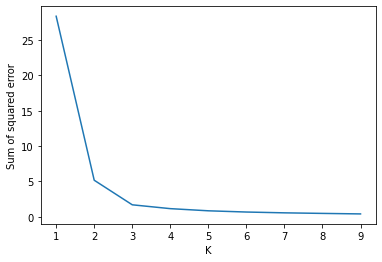

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [17]:
#since 3 is the best value for k according to elbow graph
km = KMeans(n_clusters = 3)

In [18]:
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [24]:
df['clusters'] = y_predicted
df.head(55)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,0.067797,0.041667,1
1,4.9,3.0,0.067797,0.041667,1
2,4.7,3.2,0.050847,0.041667,1
3,4.6,3.1,0.084746,0.041667,1
4,5.0,3.6,0.067797,0.041667,1
5,5.4,3.9,0.118644,0.125000,1
6,4.6,3.4,0.067797,0.083333,1
7,5.0,3.4,0.084746,0.041667,1
8,4.4,2.9,0.067797,0.041667,1
9,4.9,3.1,0.084746,0.000000,1


In [26]:
x = km.cluster_centers_[:, 0]
y = km.cluster_centers_[:, 1]

In [27]:
df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]

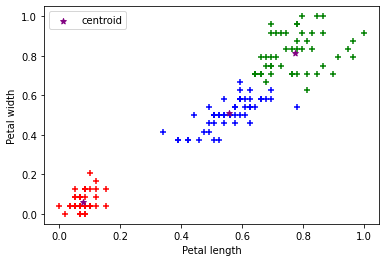

In [31]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], marker = '+', color = 'green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], marker = '+', color = 'red')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], marker = '+', color = 'blue')

plt.scatter(x, y, color = 'purple', marker = '*', label = 'centroid' )
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.show()